In [6]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.visualize import *
import seaborn as sns
output_notebook()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Visualize During ML training

In [3]:
data = Dataset('Chiang Mai')
# load raw data 
data.load_()
# build the first dataset 
data.feature_no_fire()
# use default fire feature
data.merge_fire()
data.pollutant = 'PM2.5'

data no fire has shape (77746, 15)
use default fire feature


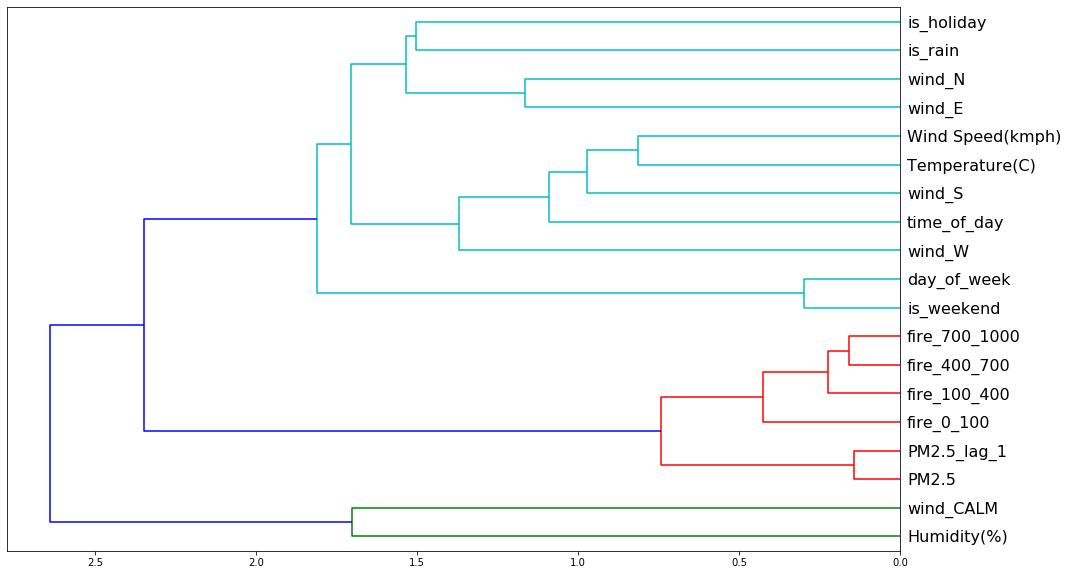

In [7]:
# plot dendogram
plot_dendogram(data=data.data)

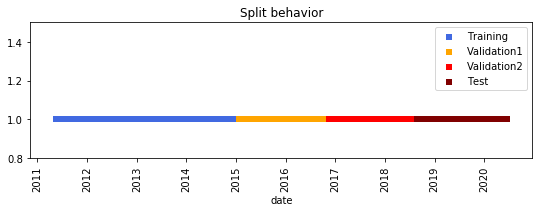

In [8]:
# visualize the split 
data.split_data(split_ratio=[0.4, 0.2, 0.2, 0.2])
display_time_split(data.split_list)

# Data Exploration Visualization

In [11]:
transition_dict = { 'PM2.5': [0, 35.5, 55.4, 150.4, 1e3],
                  'PM10': [0, 155, 254, 354, 1e3],
                  'O3':[0, 70 , 85, 105 ,1e3],
                  'SO2':[0, 75, 185, 304,1e3],
                  'NO2': [0, 100, 360, 649,1e3],
                  'CO': [0, 6.4, 12.5, 15.4,1e3]}

color_labels = ['green', 'orange', 'red','purple']
level_names = ['satisfactory', 'moderate', 'unhealthy','very unhealthy']

poll_df = data.poll_df
city_name = data.city_name

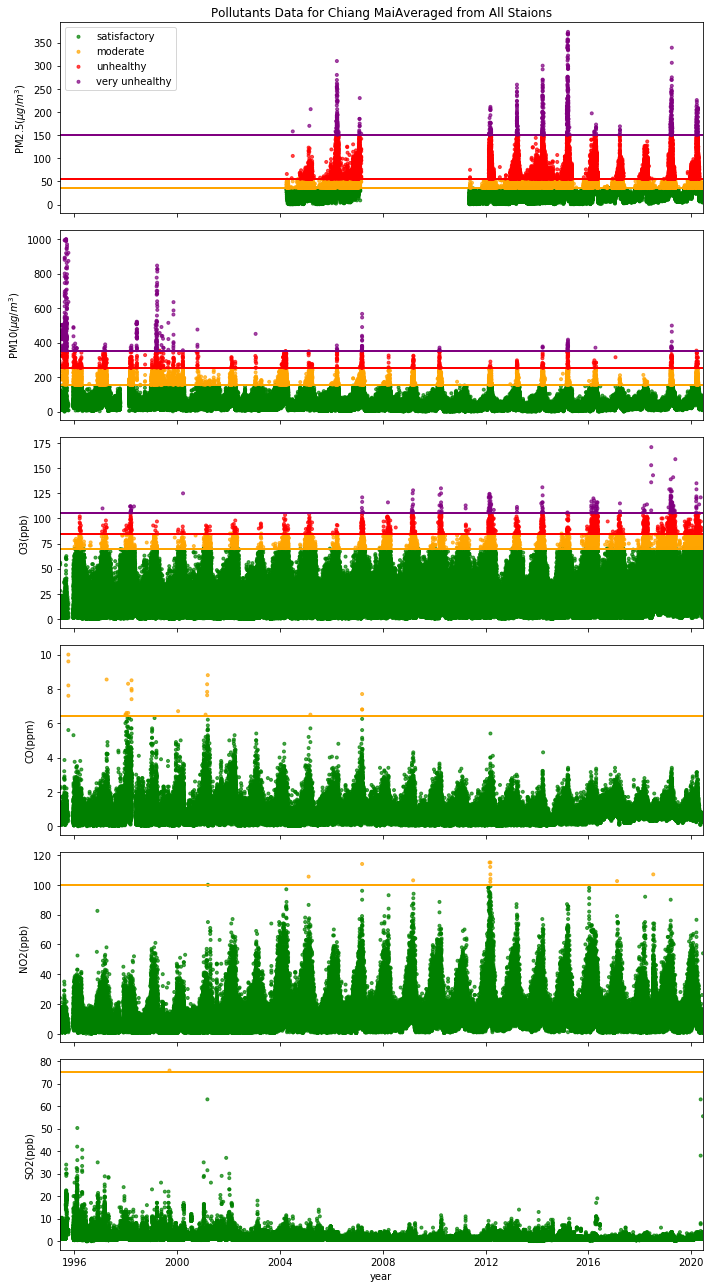

In [13]:
gas_list = poll_df.columns
len_gas = len(gas_list)
_, ax = plt.subplots(len_gas, 1, figsize=(10, 3*len_gas),sharex=True)

for i, _ in enumerate(ax):
    col = gas_list[i]
    poll_data = poll_df[[col]].dropna()
    poll_data['color'] = pd.cut(
        poll_data[col], bins=transition_dict[col], labels=color_labels)

    for color, legend in zip(color_labels, level_names):
        temp = poll_data[poll_data['color'] == color]
        # plot the data for each pollution level
        ax[i].scatter(temp.index, temp[col],
                  c=temp['color'], marker='.', label=legend,alpha=0.7)
        
        if col in ['PM10','PM2.5']:
            ax[i].set_ylabel(col + '($\mu g/m^3$)')
        elif col in ['O3','NO2','SO2']:
            ax[i].set_ylabel(col + '(ppb)')
        elif col == 'CO':
            ax[i].set_ylabel(col + '(ppm)')
        
        ax[i].axhline(transition_dict[col][1],color='orange')
        if i in [0,1,2]:
            ax[i].axhline(transition_dict[col][2],color='red')
        if i in [0,1,2]:
            ax[i].axhline(transition_dict[col][3],color='purple')
    
ax[0].legend(loc='upper left')
ax[0].set_xlim([poll_df.index.min(), poll_df.index.max()])
ax[0].set_title(f'Pollutants Data for {city_name}Averaged from All Staions')
ax[-1].set_xlabel('year')

plt.tight_layout()